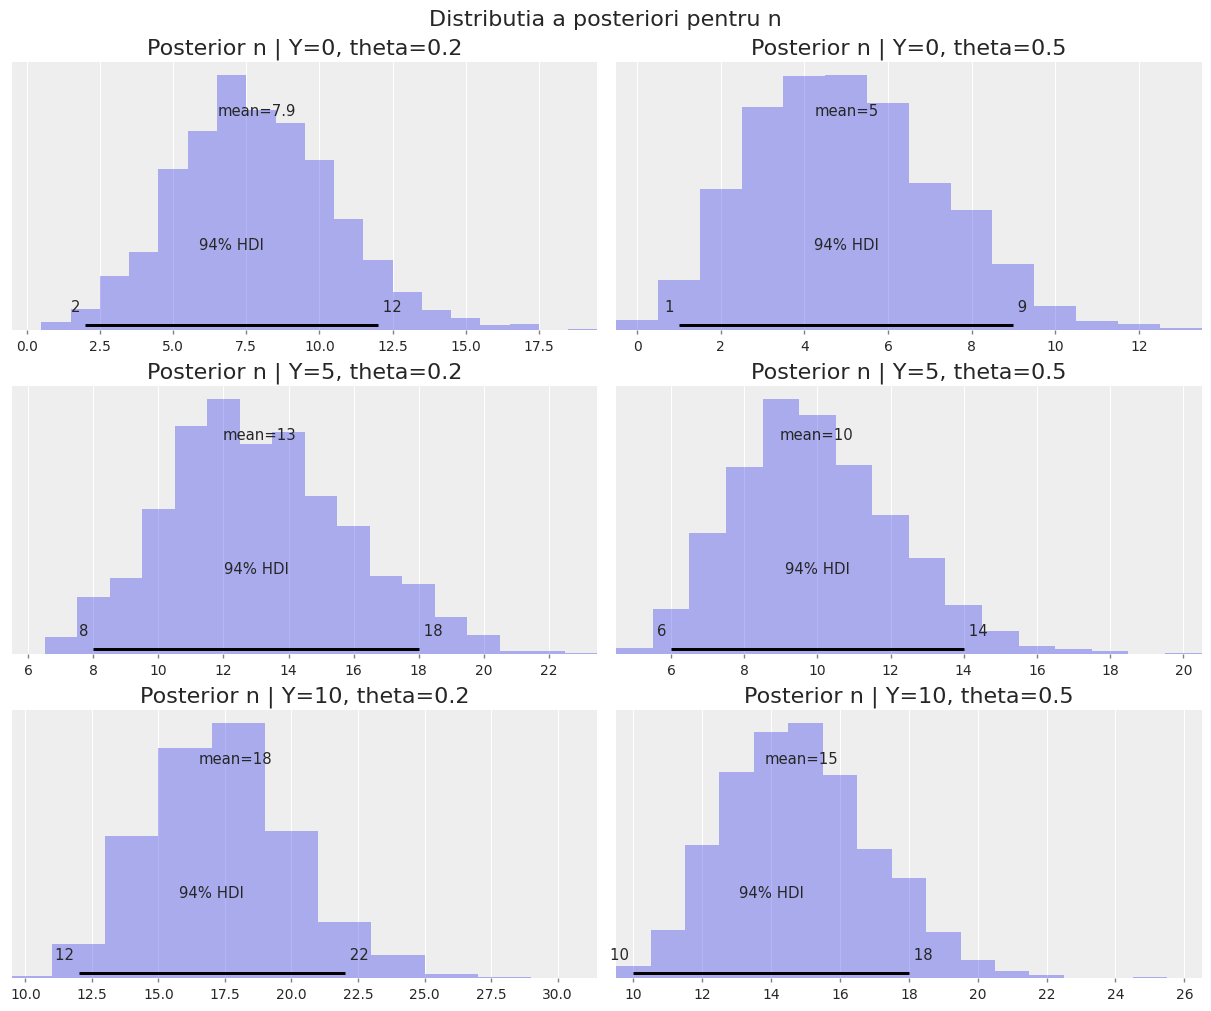

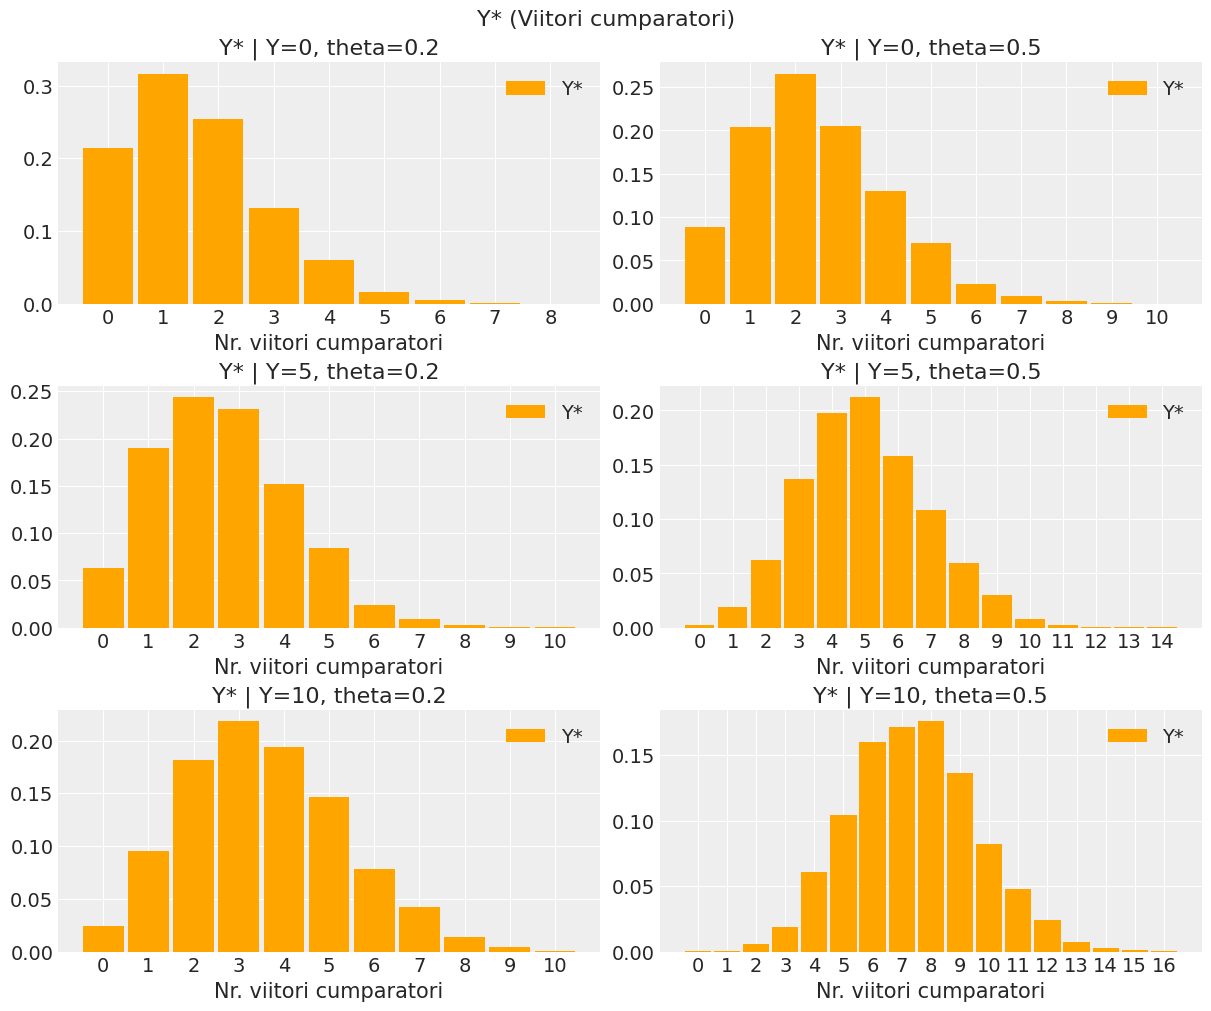

In [4]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

az.style.use("arviz-darkgrid")

y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

fig_post, axes_post = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)
fig_post.suptitle('Distributia a posteriori pentru n', fontsize=16)

fig_pred, axes_pred = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)
fig_pred.suptitle('Y* (Viitori cumparatori)', fontsize=16)


for i, date in enumerate(y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)

            obs = pm.Binomial("obs", n=n, p=theta, observed=date)

            trace = pm.sample(draws=2000, tune=1000, chains=2, return_inferencedata=True, progressbar=False)

            ppc = pm.sample_posterior_predictive(trace, model=model, extend_inferencedata=True, progressbar=False)

        ax_p = axes_post[i, j]
        az.plot_posterior(
            trace,
            var_names=["n"],
            ax=ax_p,
            hdi_prob=0.94,
            textsize=10
        )
        ax_p.set_title(f"Posterior n | Y={date}, theta={theta}")

        ax_pp = axes_pred[i, j]
        y_star_samples = ppc.posterior_predictive["obs"].values.flatten()

        az.plot_dist(y_star_samples, ax=ax_pp, color="orange", label="Y*")
        ax_pp.set_title(f"Y* | Y={date}, theta={theta}")
        ax_pp.set_xlabel("Nr. viitori cumparatori")
        ax_pp.legend()

plt.show()

#b

Când Y crește, modelul are nevoie de mai mulți clienți n ca să explice datele, deci posteriorul lui n se mută spre valori mai mari. Când θ e mai mare, fiecare client are șanse mai mari să cumpere, deci același Y poate fi obținut cu un n mai mic. Rezultatul va fi că Y ridică n, θ îl coboară.

#d

Posteriorul lui n ne spune câți clienți au fost probabil azi. Predictive posterior pentru Y* arată câți cumpărători am putea vedea mâine, ținând cont și de incertitudinea în n, și de norocul dintr-o zi nouă. De aceea distribuția pentru Y* este mai largă decât cea pentru n.
